In [2]:
#stats
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
# import ppscore as pps

#viz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np

In [6]:
csv_file_path = 'liverpatients.csv'
df = pd.read_csv('liverpatients.csv') 
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


****TB - Total Bilirubin**** is a combination of direct and indirect bilirubin. Typically, you'll get results for direct and total bilirubin. 

****DB - Direct Bilirubin**** - Higher levels of direct bilirubin in your blood may indicate your liver isn't clearing bilirubin properly

****Alkphos - Alkaline Phosphatase**** -  Test measures the level of ALP in your blood. ALP is an enzyme found in many tissues in the body, including the liver. Abnormal ALP levels can indicate a number of health conditions, including liver disease.

****Sgpt - Alanine aminotransferase (ALT)**** test measures the level of ALT in your blood. ALT is an enzyme that helps the liver convert food into energy

****Sgot - Aspartate Aminotransferase (AST)**** test, is a blood test that measures the level of the AST enzyme in your blood. This test is used to assess liver health and can help diagnose liver ailments and damage.

****TP - A total protein (TP)**** test measures the amount of albumin and globulin in your blood. Proteins are important for the health of your cells and tissues. A TP test can help diagnose a number of health conditions, including kidney and liver disease, as well as nutritional deficiencies. 

****ALB - Albumin****, which is a protein produced by the liver that helps maintain fluid balance in the body. This test can help indicate liver and kidney function. Low albumin levels can be a sign of liver or kidney disease, inflammation, or infections.

****A/G Ratio - Albumin/Globulin Ratio****, is a measurement of the amount of albumin compared to globulin in your blood. It's a part of a total protein test that measures the levels of proteins in your blood.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [15]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

SPURIOUS CORRELATION

In [46]:
fig = px.scatter(df, 
                    x = "Age",
                    y = "Alkaline_Phosphotase", trendline="ols", color="Gender",  trendline_scope="overall")
plt.figure(figsize=(3,3))
fig.update_traces(marker = dict(size = 8))
fig.update_coloraxes(showscale = True)
fig.update_layout(template = "plotly_white",
 autosize=False,
    width=500,
    height=500)
fig.update_yaxes(automargin=True)
fig.show()

<Figure size 300x300 with 0 Axes>

<Axes: >

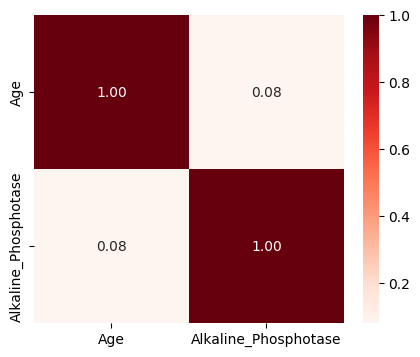

In [4]:
cols = ["Age", "Alkaline_Phosphotase"]
numerical_df = df[cols]

plt.figure(figsize=(5, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Reds', fmt='.2f')

It's also important to note that normal alkaline phosphatase levels vary with age and gender. ALP levels are typically elevated during childhood and puberty due to bone growth and development. Between the ages of 15 to 50 years, ALP levels are slightly higher in males than females. ALP levels then rise again in old age.

In [9]:
fig = px.scatter(df, 
                    x = "Total_Bilirubin",
                    y = "Direct_Bilirubin")
plt.figure(figsize=(3,3))
fig.update_traces(marker = dict(size = 8, color='indianred'))
fig.update_coloraxes(showscale = True)
fig.update_layout(template = "plotly_white",
 autosize=False,
    width=500,
    height=500)
fig.update_yaxes(automargin=True)
fig.show()

<Figure size 300x300 with 0 Axes>

In [65]:
fig = px.scatter(df, 
                    y = "Total_Protiens",
                    x = "Albumin")
plt.figure(figsize=(3,3))
fig.update_traces(marker = dict(size = 8, color='indianred'))
fig.update_coloraxes(showscale = True)
fig.update_layout(template = "plotly_white",
 autosize=False,
    width=500,
    height=500)
fig.update_yaxes(automargin=True)
fig.show()

<Figure size 300x300 with 0 Axes>

In [22]:
fig = px.scatter(df, 
                    x = "Albumin_and_Globulin_Ratio",
                    y = "Albumin")
plt.figure(figsize=(3,3))
fig.update_traces(marker = dict(size = 8, color='indianred'))
fig.update_coloraxes(showscale = True)
fig.update_layout(template = "plotly_white",
 autosize=False,
    width=500,
    height=500)
fig.update_yaxes(automargin=True)
fig.show()

<Figure size 300x300 with 0 Axes>

In [ ]:
# Categorical Value Handling
def convertgender(x):
    if x== 'Male':
        return 0
    else:
        return 1
df['Gender Numeric'] = df['Gender'].map(convertgender)
df.head()

In [ ]:
df.corr()

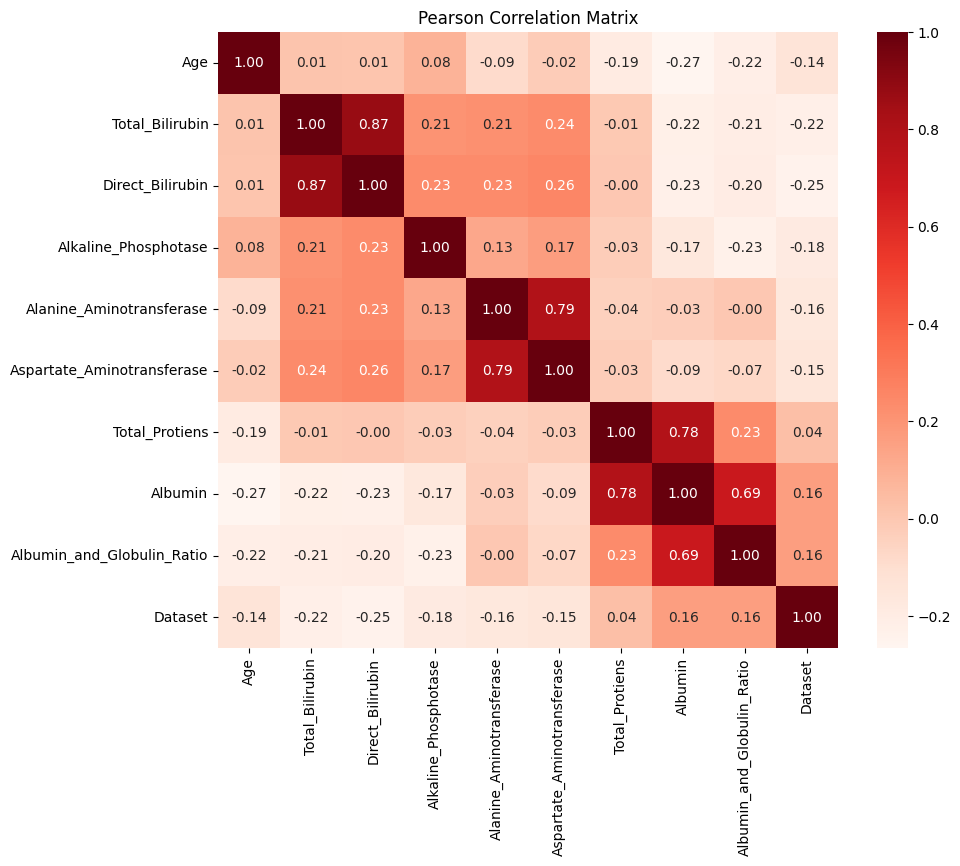

In [7]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

# cols = ["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
#         "Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio"]
# numerical_df = df[cols]

# plt.figure(figsize=(10, 8))
# sns.heatmap(numerical_df.corr(), annot=True, cmap='Reds', fmt='.2f')
# plt.title('Pearson Correlation Matrix')
# plt.show()

It is seen that there are some pairs of variables that have a linear relationship, for example:

ALB and A/G Ratio

TP and ALB

TB and DB


C:\Users\Intel_i3\AppData\Local\Temp\ipykernel_10372\1677871834.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



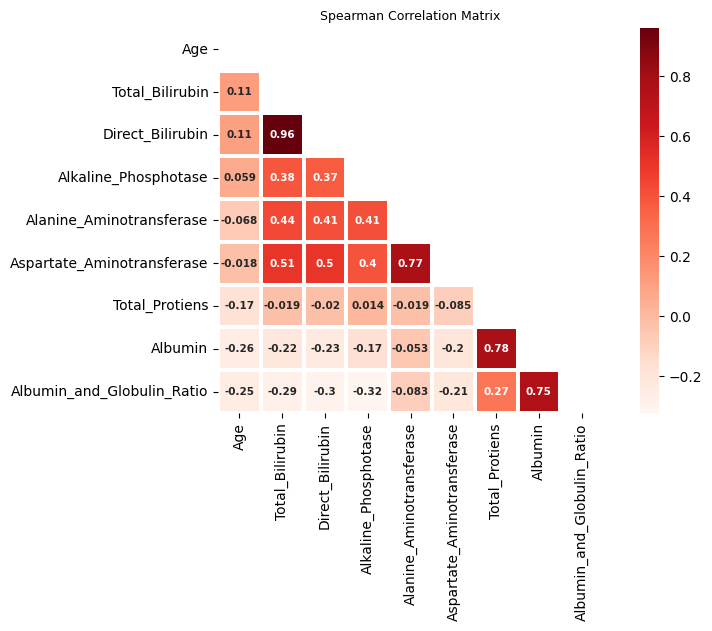

In [55]:
numerical_features =  ["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
        "Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio"]
plt.style.use('default')
corr_matrix_spearman = df[numerical_features].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix_spearman, dtype = bool))

fig,ax = plt.subplots(figsize = (9.5, 5))
sns.heatmap(corr_matrix_spearman, 
            cmap = 'Reds', 
            annot = True, 
            annot_kws = {'fontsize':7.5, 'fontweight':'bold'}, 
            linewidths = 1.5, 
            square = True, 
            mask = mask,
            ax = ax)
ax.set_title("Spearman Correlation Matrix", fontsize = 9, fontweight = 'normal', color = 'black')
fig.show()

In [57]:
print("Albumin  & Albumin_and_Globulin_Ratio")
pg.corr(df['Albumin'], df['Albumin_and_Globulin_Ratio'], method = 'spearman')

Albumin  & Albumin_and_Globulin_Ratio


,n,r,CI95%,p-val,power
spearman,579,0.75414,"[0.72, 0.79]",1.857640e-107,1.0


In [60]:
print("Total_Protiens  & Albumin")
pg.corr(df['Total_Protiens'], df['Albumin'], method = 'spearman')

Total_Protiens  & Albumin


,n,r,CI95%,p-val,power
spearman,583,0.779077,"[0.75, 0.81]",6.477305e-120,1.0


In [59]:
print("Total_Bilirubin  & Direct_Bilirubin")
pg.corr(df['Total_Bilirubin'], df['Direct_Bilirubin'], method = 'spearman')

Total_Bilirubin  & Direct_Bilirubin


,n,r,CI95%,p-val,power
spearman,583,0.959216,"[0.95, 0.97]",5.424841e-321,1.0


Selector

The Selector variable only takes two values, but they are in numerical format, so we are going to convert it to a string object since according to the information provided it tells us that these values ​​must be liver disease or without liver disease.

In [62]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [64]:
from plotly.express import histogram

for column in df.columns:
    histogram(data_frame=df, x=column, color='Dataset', log_y=column in {"Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase",
        "Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio"}).show()